# <center>Analyse des ventes d'une librairie</center>

# <center>EDA</center>

## Importation des librairies

In [3]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des dataset

In [4]:
customers = pd.read_csv("customers.csv")

products = pd.read_csv("products.csv")

transactions = pd.read_csv("transactions.csv")

***

***

### *-customers est un data set regroupant les données clients.*
### *-products est un data set regroupant les données produits.*
### *-transactions est un data set regroupant les données des transactions, l'on y retrouve les id clients et products, ce data set permet une liaison.*

## <center>Shape</center>

In [5]:
print("Customers shape -->", customers.shape)
print("Products shape -->", products.shape)
print("Transactions shape -->", transactions.shape)

Customers shape --> (8623, 3)
Products shape --> (3287, 3)
Transactions shape --> (679532, 4)


## <center>Head</center>

In [6]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [7]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [8]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


## <center>Infos</center>

In [9]:
print("CUSTOMERS")
customers.info()
print("*****************************************************")
print("PRODUCTS")
products.info()
print("*****************************************************")
print("TRANSACTIONS")
transactions.info()

CUSTOMERS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
*****************************************************
PRODUCTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
*****************************************************
TRANSACTIONS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtyp

***

*Nous pouvons déjà constater que:*

*-Il n'y a pas de valeurs manquantes dans les 3 dataset.*

*-Il y a plusieurs types de données.*

*-La colonne data n'est pas au format "DateTime".*

*-Tous les "id" son au format "objet".*

*-Il y a peu de colonnes.*

## <center>Stats</center>

### Customers

In [10]:
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


*Les clients les moins agés ont 18 ans et les plus vieux ont 93 ans.*

*La moyenne d'âge est 44 ans.*

<AxesSubplot:xlabel='birth'>

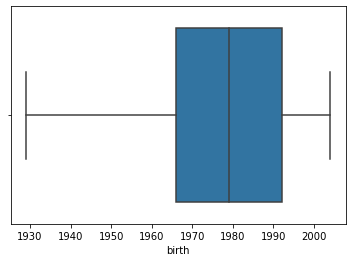

In [11]:
sns.boxplot(x = customers["birth"])

In [12]:
customers["birth"].var()

286.27066998051293

*Il y a des valeurs variées, mais pas de valeurs abberantes, les plus jeune ont 18 ans, la majorité de la clientèle à entre 18 et 65 ans.*

*Il y a des clients des âges très avancés mais étant donné que nous sommes sur une librairies et que le compte peut avoir été créer par un membre de la famille, cela ne me choque pas.*

In [13]:
cvc = customers["birth"].value_counts()
cvc = pd.DataFrame(cvc)
pd.set_option('display.max_rows', 500)
cvc

,birth
2004,440
1979,215
1988,207
1986,203
1978,199
1982,191
1980,191
1992,188
1968,181
1996,179


In [14]:
birth_percentage = customers["birth"].value_counts()*100/len(customers["birth"])
birth_percentage = pd.DataFrame(birth_percentage)
birth_percentage

,birth
2004,5.102632
1979,2.493332
1988,2.400557
1986,2.354169
1978,2.307782
1982,2.215006
1980,2.215006
1992,2.180216
1968,2.099037
1996,2.075844


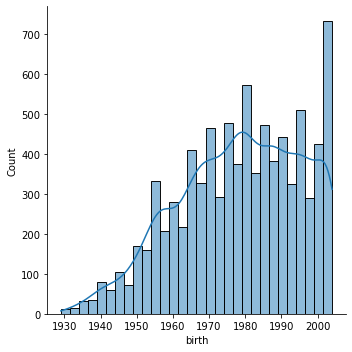

In [15]:
sns.displot(data=customers, x="birth", kde=True)

In [16]:
import datetime
date = datetime.date.today()
year = int(date.strftime("%Y"))
customers["age"] = year - customers["birth"]

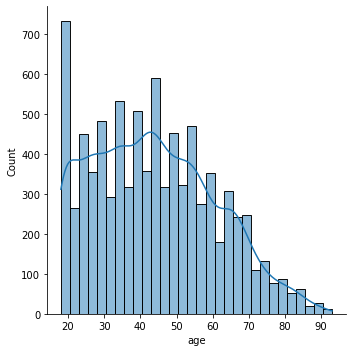

In [17]:
sns.displot(data=customers, x="age", kde=True)

<AxesSubplot:xlabel='age', ylabel='count'>

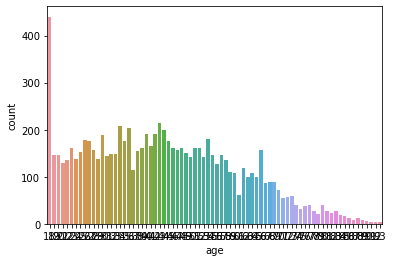

In [18]:
sns.countplot(data=customers, x="age")

*Dans ce graphique on peut voir que l'âge 18 est sur représenté.*

<AxesSubplot:xlabel='sex', ylabel='count'>

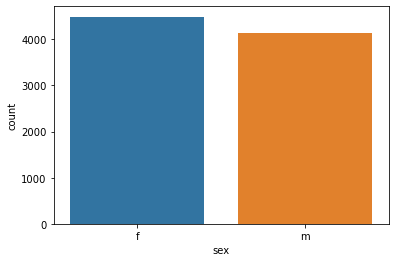

In [19]:
sns.countplot(data=customers, x="sex")

In [20]:
sex_percentage = customers["sex"].value_counts()*100/len(customers["sex"])
sex_percentage = pd.DataFrame(sex_percentage)
sex_percentage

,sex
f,52.081642
m,47.918358


*Il y a quasiment autant de d'homme que de femmes, il y a un différence de 4.17% environ donnant la majorité aux femmes.*

***

### Products

In [21]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


*Il y a des valeurs qui interpelles ici car nous avons la valeur min qui est de -1, nous avons 75% des valeurs qui ne dépassent pas 22.99 et une moyenne de 21.85, mais nous avons en valeur max 300.*

*IL FAUT QUE JE REGARDE POURQUOI J'AI UNE VALEUR DE -1 DANS LES PRIX
(VOIR UN PEU PLUS BAS).*

<AxesSubplot:xlabel='price', ylabel='Count'>

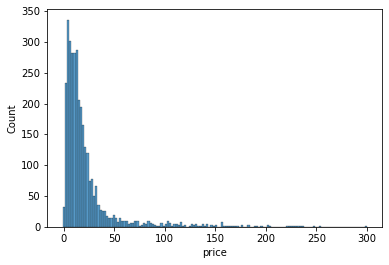

In [22]:
sns.histplot(data=products, x="price")

*Les valeurs distribuées de manières asymetriques.*

<AxesSubplot:xlabel='price'>

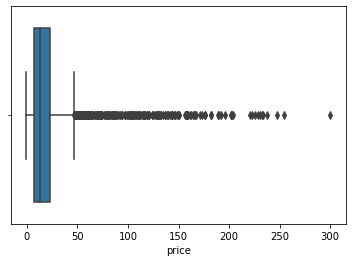

In [23]:
sns.boxplot(x = products["price"])

*Il y beaucoup d'outliers present.*

In [24]:
products["price"].var()

890.8975825076452

In [25]:
price_percentage = products["price"].value_counts()*100/len(products["price"])
price_percentage = pd.DataFrame(price_percentage)
price_percentage

,price
4.99,2.585945
6.99,2.555522
3.99,2.433830
5.99,2.372984
8.99,2.251293
...,...
6.50,0.030423
5.40,0.030423
10.89,0.030423
5.25,0.030423


*Il y a beaucoup de prix différents, la grande majorité comme dit plus haut sont des prix relativement bas, la majorité ne dépasse pas 22.99.*

*Il faudrait comprendre d'où viennent les outliers, j'ai vu qu'il y avait plusieurs catégories peut-être que cela pourra nous aider à comprendre la grande variance et la présence d'outliers.*

<AxesSubplot:xlabel='price', ylabel='categ'>

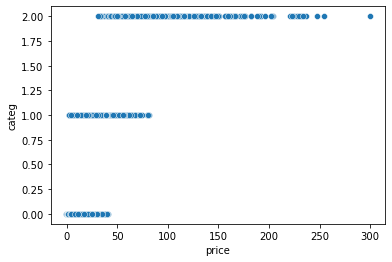

In [26]:
sns.scatterplot(data=products, x="price", y="categ")

*Chaque catégories regroupe une intervalle de prix.*

*RETOUR A LA VALEUR NEGATIVE TROUVEE PLUS HAUT*

In [27]:
products.loc[products['price'] == -1]

,id_prod,price,categ
731,T_0,-1.0,0


In [28]:
products.loc[products['price'] == 0]

,id_prod,price,categ


In [29]:
products[products["id_prod"].str.contains("T")]

,id_prod,price,categ
731,T_0,-1.0,0


*Je n'ai qu'une ligne dans products ayant un prix négatif et la valeur "T".*

*Pour l'instant je ne sais pas pourquoi j'ai une valeur négative dans mes prix, peut-être que c'est une erreur, je laisse ça pour l'instant et à voir en fin d'analyse si j'en apprends un peu plus.*

***

### Transactions

In [30]:
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


*Il y a une ligne bizzard "test_2021-03-01 02:30:02.237413" dans la colonne date.*

*Je comprends donc pourquoi la colonne date est en string et non en format DateTime.*

*Je me suis rendue compte plus haut en faisant des head pour chaque dataset qu'il avait tous une nomencalture.*

*id_prod commence toujours par le chiffre de la categorie corrrespondante suivit d'un underscore et puis du nombre.*

*session_id commence toujours par s et est suivit d'un underscore et puis du nombre.*

*client_id commence toujours par c et est suivit d'un underscore et puis du nombre.*

*Mais plus haut en cherchant la ligne du prix negatif j'ai vu que le id_prod commencait par un T.*

*Il faut que je comprenne pourquoi il y a une ou plusieus lignes avec la valeurs "test...", "T...", et si il y a d'autres valeurs dans le genre, et aussi ce qu'elle apportent comme infos et par conséquent ce que je peux en faire.*

In [31]:
transactions[transactions["date"].str.contains("test")]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
23678,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_1
23696,T_0,test_2021-03-01 02:30:02.237444,s_0,ct_0
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
35433,T_0,test_2021-03-01 02:30:02.237418,s_0,ct_1


In [32]:
len(transactions[transactions["date"].str.contains("test")])

200

In [33]:
values_transa = transactions['session_id'].value_counts()
values_transa = pd.DataFrame(values_transa)
pd.set_option('display.max_rows', 50)
values_transa.reset_index(inplace = True)
values_transa.sort_values("index", ascending=True, inplace = True)
values_transa

,index,session_id
0,s_0,200
244436,s_1,1
253298,s_10,1
127376,s_100,2
24537,s_1000,4
...,...,...
78850,s_99994,3
208814,s_99995,1
24356,s_99996,4
225112,s_99997,1


*On retrouve avec s_0 les 200 lignes test.*

In [34]:
values_transa_date = transactions['date'].value_counts()
values_transa_date = pd.DataFrame(values_transa_date)
pd.set_option('display.max_rows', 50)
values_transa_date.reset_index(inplace = True)
values_transa_date.sort_values("index", ascending=False, inplace = True)
values_transa_date

,index,date
657162,test_2021-03-01 02:30:02.237450,1
34,test_2021-03-01 02:30:02.237449,3
152594,test_2021-03-01 02:30:02.237448,1
32,test_2021-03-01 02:30:02.237447,3
7,test_2021-03-01 02:30:02.237446,7
...,...,...
41849,2021-03-01 00:05:18.801198,1
77971,2021-03-01 00:04:54.559692,1
13236,2021-03-01 00:02:38.311413,1
31213,2021-03-01 00:02:26.047414,1


In [35]:
customers[customers["client_id"].str.contains("ct")]

,client_id,sex,birth,age
2735,ct_0,f,2001,21
8494,ct_1,m,2001,21


In [36]:
values_custo = customers['client_id'].value_counts()
values_custo = pd.DataFrame(values_custo)
pd.set_option('display.max_rows', 50)
values_custo.reset_index(inplace = True)
values_custo.sort_values("index", ascending=True, inplace = True)
values_custo

,index,client_id
7188,c_1,1
3448,c_10,1
5038,c_100,1
2730,c_1000,1
6983,c_1001,1
...,...,...
5666,c_997,1
5030,c_998,1
3791,c_999,1
8483,ct_0,1


*En parcourant la liste l'on voit qu'il n'y a que ct_0 et ct_1 qui soit différentes comme valeurs.*

In [37]:
products[products["id_prod"].str.contains("T_")]

,id_prod,price,categ
731,T_0,-1.0,0


In [38]:
values_prod = products["id_prod"].value_counts()
values_prod = pd.DataFrame(values_prod)
pd.set_option('display.max_rows', 50)
values_prod.reset_index(inplace = True)
values_prod.sort_values("index", ascending=True, inplace = True)
values_prod

,index,id_prod
2955,0_0,1
1909,0_1,1
1587,0_10,1
1974,0_100,1
3055,0_1000,1
...,...,...
1266,2_96,1
1566,2_97,1
1162,2_98,1
1057,2_99,1


*En parcourant la liste l'on voit qu'il n'y a que T_0 qui soit différent comme valeur.*

*Il y a des lignes test.*

*Dans products il y a un produit test ayant l'id_prod T_0.*

*Dans customers il y a deux clients test ayant les client_id ct_0 pour les femmes et ct_1 pour les hommes.*

*Dans transactions il y 200 lignes test ayant les session_id s_0.*

*A NOTER QUE LES DIFFERENTES LIGNES TEST TROUVEES DANS LES 3 DATASET NE PEUVENT PAS ÊTRE PRISES EN COMPTE POUR L'ANALYSE, IL FAUDRAIT DONC LES METTRE DE CÔTE / LES SUPPRIMER.*

*POUR L'INSTANT JE SUIS DANS LA PHASE D'ANALYSE ET NON D'ACTIONS.*

***

***

## <center>Unicité des clés primaires</center>

### Customers

In [39]:
customers.columns

Index(['client_id', 'sex', 'birth', 'age'], dtype='object')

*Un client_id représente un client de manière unique, je ne dois donc pas avoir deux lignes identiques, ni d'autres lignes ayant un même client_id.*

*Il n'y a que deux sex possibles, donc je vais le retrouver plusieurs fois.*

*Il est possible d'avoir plusieurs clients nés la même années.*

In [40]:
customers.duplicated().sum()

0

In [41]:
customers["client_id"].duplicated().sum()

0

*Je n'ai pas de client_id en double.*

*Chaque ligne est unique.*

### Products

In [42]:
products.columns

Index(['id_prod', 'price', 'categ'], dtype='object')

*Un id_prod représente un produit de manière unique, je ne dois donc pas avoir deux lignes identiques, ni d'autres lignes ayant un même id_prod.*

*Il est possible d'avoir plusieurs prix similaires.*

*Il n'y a que 3 catégories possibles, donc je vais les retrouver plusieurs fois.*

In [43]:
products.duplicated().sum()

0

In [44]:
products["id_prod"].duplicated().sum()

0

*Je n'ai pas de id_prod en double.*

*Chaque ligne est unique.*

### Transactions

In [45]:
transactions.columns

Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')

In [46]:
transactions.duplicated().sum()

126

In [47]:
transactions["session_id"].duplicated().sum()

337216

In [48]:
transactions["id_prod"].duplicated().sum()

676265

*Une transaction correspond à un produit acheté à une date pendant une session par un client.*

In [49]:
dup = transactions[transactions.duplicated() == True]
dup.sort_values("date", ascending=True, inplace = True)
dup

C:\Users\DjamelAyari\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,id_prod,date,session_id,client_id
606326,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
453857,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
548383,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
255856,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
...,...,...,...,...
379783,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
633911,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
320833,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
621687,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1


*Toutes mes lignes dupliquées dans transactions correspondent à des lignes "Test".*

*Pour rappel transactions est le dataset qui répetorie les transactions et une transactions est définit par sa date et son id (session_id).*

*Un produit peut apparaitre sur plusieurs transactions.*

*Une même personne (client_id) peut effectuer plusieurs transactions.*

*Une même date peut exister pour plusieurs transactions différentes (faites par différentes personnes).*

In [50]:
transactionscopy = transactions.copy()
pd.set_option('display.max_rows', 10)
transactionscopy.sort_values("session_id", ascending=True, inplace = True)
transactionscopy.tail(10)

,id_prod,date,session_id,client_id
312476,0_1407,2021-10-04 18:40:10.702738,s_99994,c_7685
541544,0_1784,2021-10-04 18:35:32.201073,s_99995,c_4170
85724,0_2231,2021-10-04 18:38:36.333661,s_99996,c_4900
671163,0_1609,2021-10-04 18:39:10.485474,s_99996,c_4900
218613,0_1475,2021-10-04 18:45:05.640783,s_99996,c_4900
508968,0_1362,2021-10-04 18:58:49.228317,s_99996,c_4900
504526,0_1197,2021-10-04 18:45:38.003516,s_99997,c_3521
633558,0_1572,2021-10-04 18:45:54.374885,s_99998,c_2795
48865,0_1411,2021-10-04 18:50:59.099942,s_99998,c_2795
599185,0_1604,2021-10-04 19:00:20.030388,s_99998,c_2795


*Il semblerai que session_id soit en rapport avec le client_id, que session_id soit en quelque sorte l'id du panier d'achat client.*

*Car en effet session_id ne peut pas ce rapporter à la date car celle-ci prends en compte les heures, minutes, secondes et millièmes de secondes, ce qui impliquerai un changement de session_id pour chaque millièmes de seondes passées.*

*Mais il est cohérent de considérer une connexion comme étant une session d'achat, une connexion = un panier d'achat = une session.*

*D'ailleurs en observant session_id et client_id l'on ce rends compte que un session_id est toujours en rapport avec un seul client_id.*

*Et une même personne (client_id) peut effectuer plusieurs sessions d'achat, donc un client_id peut avoir plusieurs session_id.*

*L'on peut aussi constater que le même session_id apparait plusieurs fois dans transactions car étant donné que chaque ligne compte pour un product_id, si un client au cours de sa sessions d'achat achète plusieurs produits, il y aura autant de ligne que de product_id et donc il y aura plusieurs lignes avec le même session_id et client_id.*

*On sait donc que ce qui consitue la ligne c'est --> l'identifiant du produit pour un date donnée au cours de la session x du client x.*

*Mais nous avons vu et bien mis en lumière plus haut quand dans transactions il y avait 126 lignes doublons, donc l'unicité de notre clé primaire n'est pas bonne.*

***

***

***Sauvegarde des modifications apportées au dataset "customers"***

In [51]:
customers.to_csv('customers_bis.csv')